In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Import zeszytu z ustawieniami:
%cd '/content/drive/My Drive/ColabNotebooks/WorldHappiness/'
%run WorldHappinessReport_configuration.ipynb


happiness2018 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2018.csv', low_memory=False)

DistributionObj = Distribution(happiness2018)
CorrelationObj = Correlation(dataset=happiness2018)

happiness2018.head()

/content/drive/My Drive/ColabNotebooks/WorldHappiness


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [2]:
happiness2018.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       155 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 19.8 KB


In [3]:
happiness2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


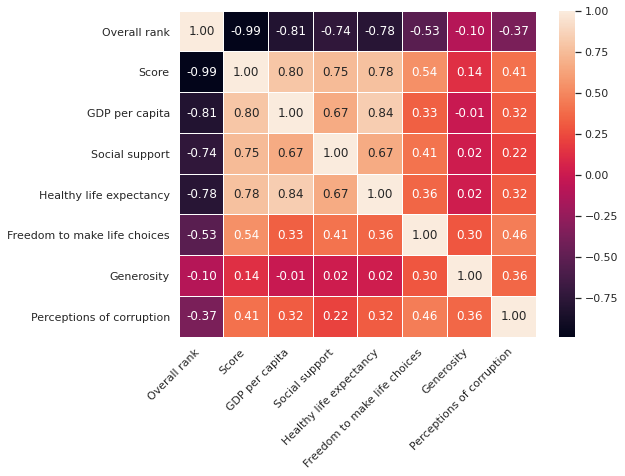

In [4]:
CorrelationObj.addCorrelationmap

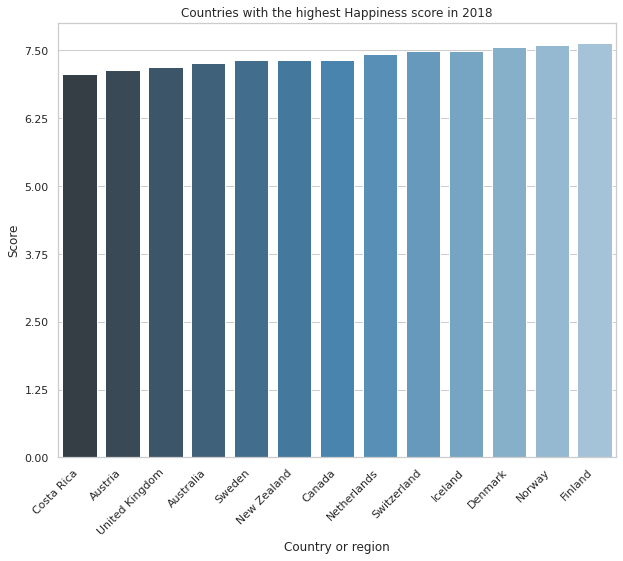

In [5]:
# Countries with the highest Happiness score in 2018
Sortedhappiness2018 = happiness2018.sort_values(by='Score')
Sortedhappiness2018Greaterthan7 = Sortedhappiness2018['Score'] >= 7
Sortedhappiness2018Greaterthan7 = Sortedhappiness2018[Sortedhappiness2018Greaterthan7]

x_data= 'Country or region'

sns.set_style('whitegrid') 
plt.figure(figsize=(10,8))
plt.yticks(np.arange(0, 14, step=1.25))

g = sns.barplot(  data=Sortedhappiness2018Greaterthan7, x=x_data,  y='Score',palette='Blues_d'  )

g.set( xlabel='Country or region', ylabel='Score', title='Countries with the highest Happiness score in 2018')
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
plt.show()

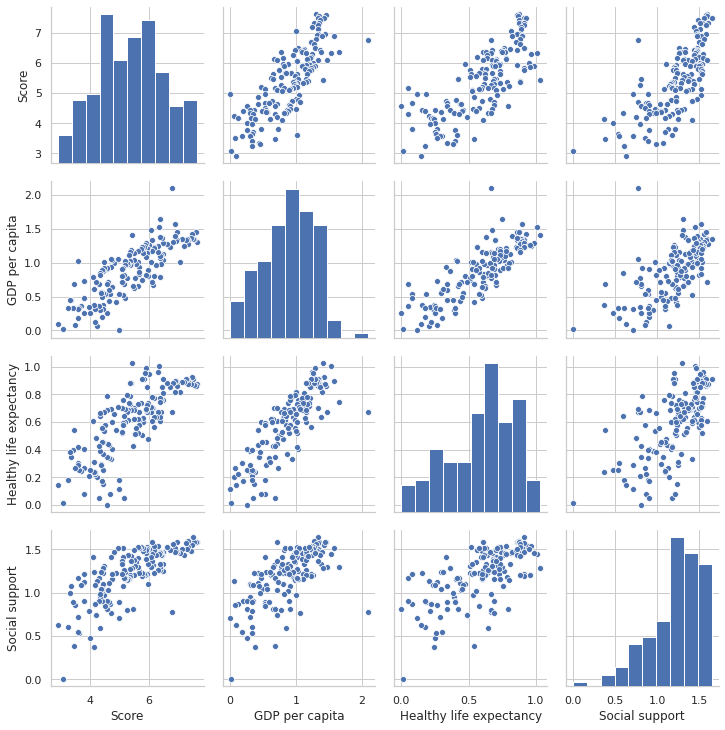

In [6]:
colNames = ['Score', 'GDP per capita', 'Healthy life expectancy', 'Social support']
sns.pairplot(happiness2018[colNames])
plt.show()

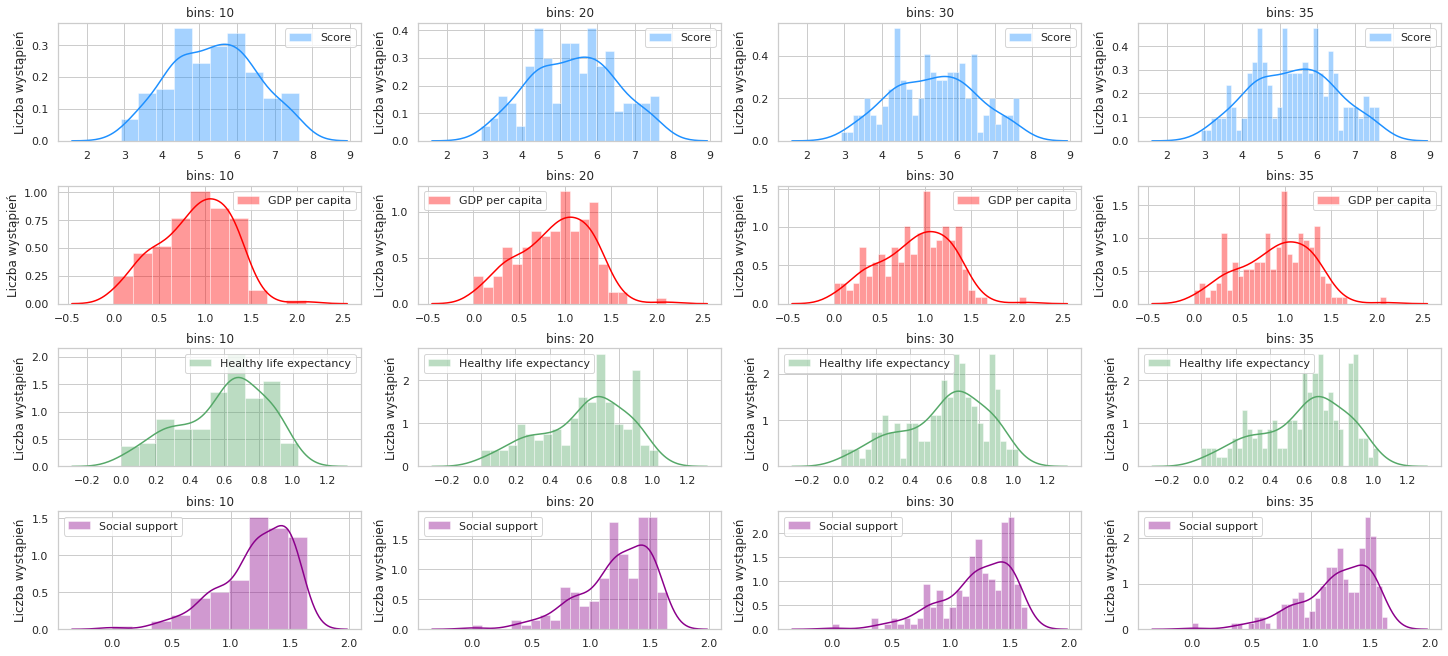

In [7]:
binsValues = [10,20,30,35]
DistributionObj.addHist_with_variety_values_of_bins(value=colNames, bins=binsValues, set_width=20,  set_height=9)

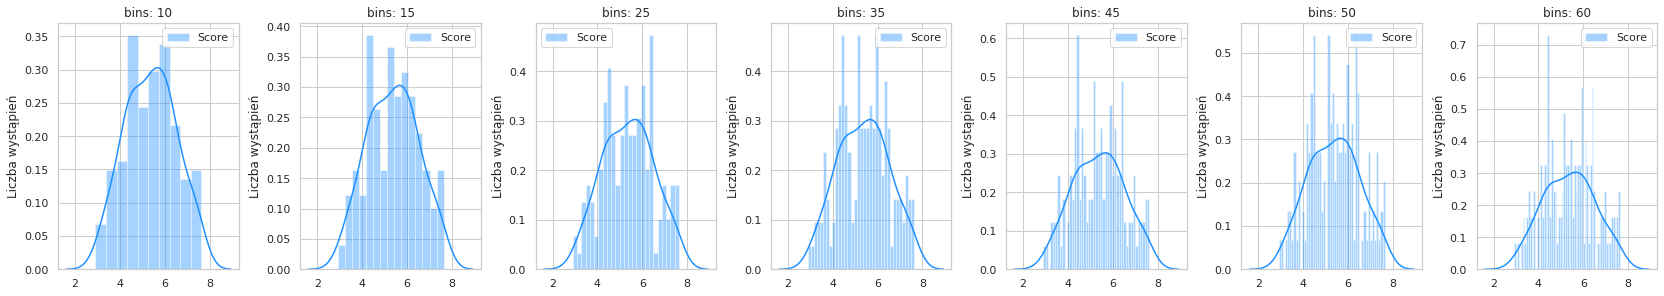

In [8]:
binsValues = [10, 15, 25, 35, 45, 50, 60]
DistributionObj.addHist_with_variety_values_of_bins(value=colNames[0], bins=binsValues, set_width=23, set_height=4)

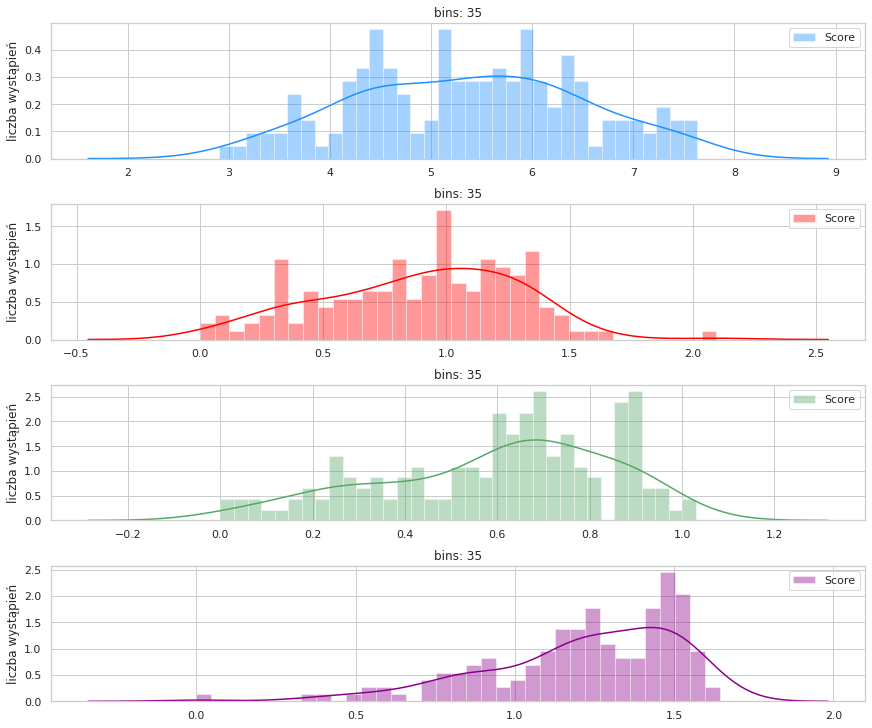

In [9]:
DistributionObj.addHist(value=colNames, bins=35, set_height=10, set_width=12 )

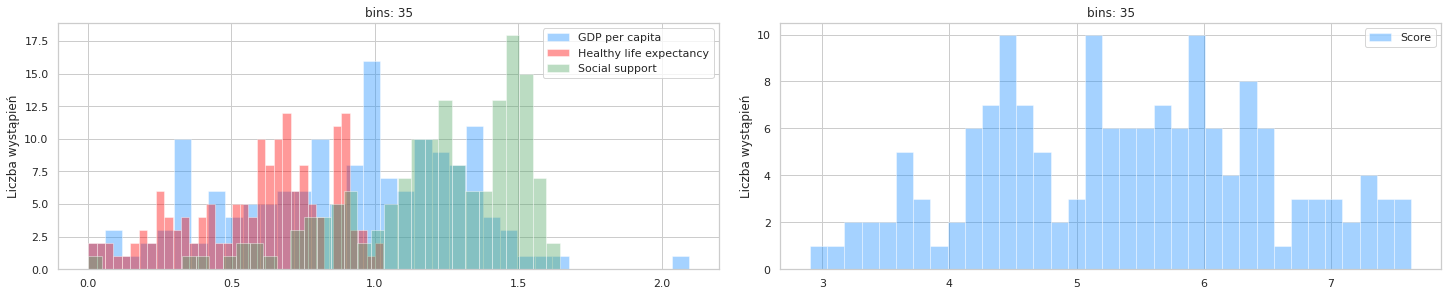

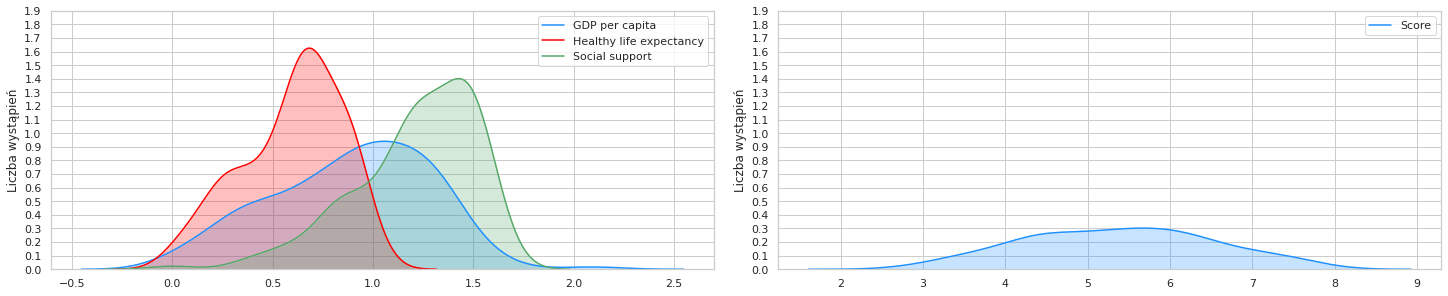

In [10]:
DistributionObj.addStackedHist(list= colNames, bins=35, set_width=20, set_height=4)
DistributionObj.addDensityDistribution(value=colNames, set_width=20, set_height=4)

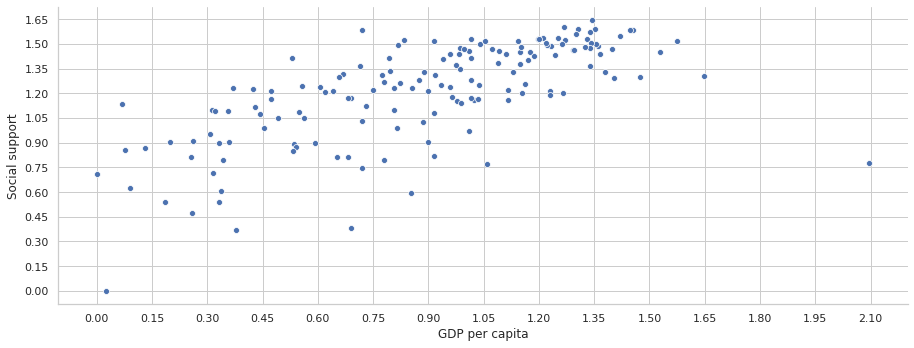

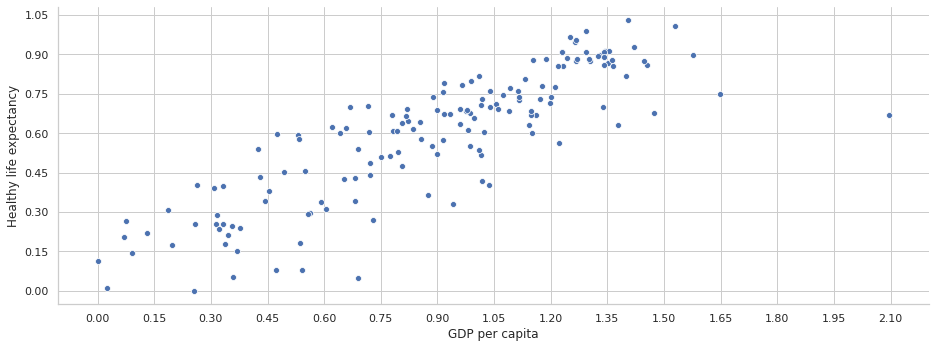

In [11]:
CorrelationObj.addScatterPlot(y_data='Social support', x_data='GDP per capita', xstep=0.15, ystep=0.15, width=15, height=5)
CorrelationObj.addScatterPlot(y_data='Healthy life expectancy', x_data='GDP per capita', xstep=0.15, ystep=0.15, width=15, height=5)

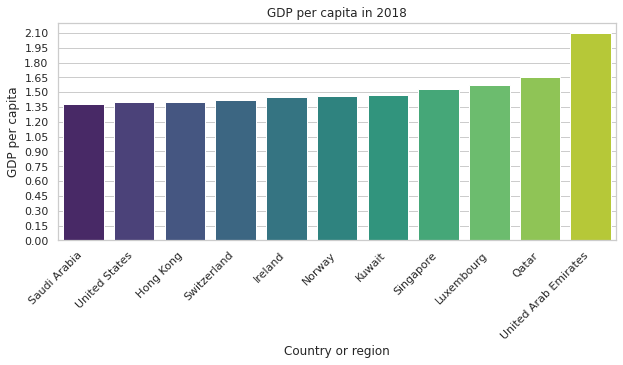

In [12]:
GDPperCapita_greaterThan1dota37 = happiness2018['GDP per capita'] >= 1.37

GDOP_data = happiness2018[GDPperCapita_greaterThan1dota37].sort_values(by='GDP per capita')


sns.set_style('whitegrid') 
plt.figure(figsize=(10,4))
plt.yticks(np.arange(0, 2.15, step=0.15))

g = sns.barplot(  data=GDOP_data, x='Country or region',  y='GDP per capita',palette='viridis'  )

g.set( xlabel='Country or region', ylabel='GDP per capita', title='GDP per capita in 2018')
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
plt.show()

In [13]:
happiness2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


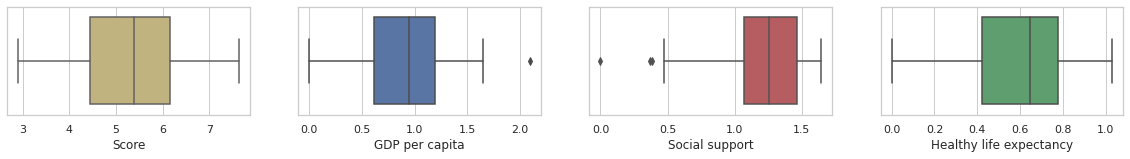

In [14]:
fig, axes = plt.subplots(1,4, figsize=(20,2))

sns.boxplot(  x="Score", data=happiness2018, ax=axes[0], color='y')
sns.boxplot(  x="GDP per capita", data=happiness2018, ax=axes[1], color='b')
sns.boxplot(  x="Social support", data=happiness2018, ax=axes[2], color='r')
sns.boxplot(  x="Healthy life expectancy", data=happiness2018, ax=axes[3], color='g')
plt.show()

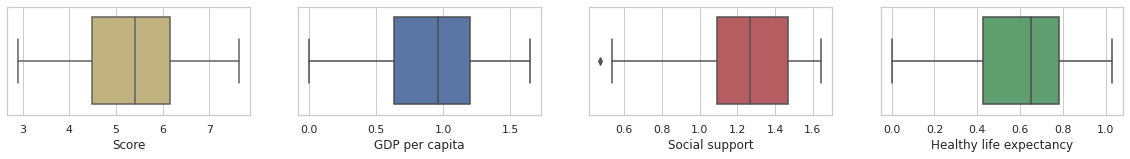

In [15]:
colNames = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy']

# wyznaczamy dolną część pudełka (lewa część)
Q1 = happiness2018[colNames].quantile(0.25)

# wyznaczamy górną część pudełka (prawa część)
Q3 =  happiness2018[colNames].quantile(0.75)

# IQR - rozstęp kwartylowy
IQR = Q3 - Q1

outlier_condit =  ((happiness2018[colNames] < (Q1 - 1.5*IQR)) | (happiness2018[colNames] > (Q3 + 1.5*IQR)) ) 

happiness2018_iqr = happiness2018[colNames][~outlier_condit.any(axis=1)]


fig, axes = plt.subplots(1,4, figsize=(20,2))

sns.boxplot(  x="Score", data=happiness2018_iqr, ax=axes[0], color='y')
sns.boxplot(  x="GDP per capita", data=happiness2018_iqr, ax=axes[1], color='b')
sns.boxplot(  x="Social support", data=happiness2018_iqr, ax=axes[2], color='r')
sns.boxplot(  x="Healthy life expectancy", data=happiness2018_iqr, ax=axes[3], color='g')
plt.show()

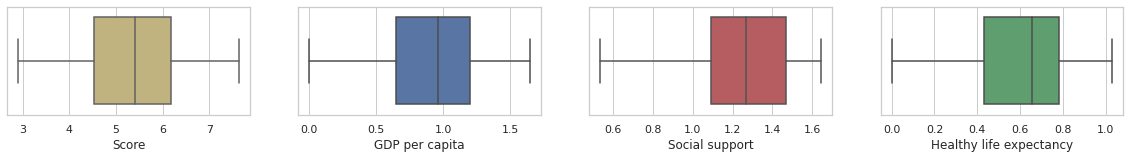

In [16]:
# wyznaczamy dolną część pudełka (lewa część)
Q1 = happiness2018_iqr[colNames].quantile(0.25)

# wyznaczamy górną część pudełka (prawa część)
Q3 =  happiness2018_iqr[colNames].quantile(0.75)

# IQR - rozstęp kwartylowy
IQR = Q3 - Q1

outlier_condit =  ((happiness2018_iqr[colNames] < (Q1 - 1.5*IQR)) | (happiness2018_iqr[colNames] > (Q3 + 1.5*IQR)) ) 

happiness2018_iqr = happiness2018_iqr[colNames][~outlier_condit.any(axis=1)]
happiness2018_iqr

fig, axes = plt.subplots(1,4, figsize=(20,2))

sns.boxplot(  x="Score", data=happiness2018_iqr, ax=axes[0], color='y')
sns.boxplot(  x="GDP per capita", data=happiness2018_iqr, ax=axes[1], color='b')
sns.boxplot(  x="Social support", data=happiness2018_iqr, ax=axes[2], color='r')
sns.boxplot(  x="Healthy life expectancy", data=happiness2018_iqr, ax=axes[3], color='g')
plt.show()

In [0]:
X = happiness2018[['GDP per capita', 'Social support', 'Healthy life expectancy']].values
y = happiness2018['Score'].values.reshape(-1,1)

X_iqr = happiness2018_iqr[['GDP per capita', 'Healthy life expectancy', 'Social support']].values
y_iqr = happiness2018_iqr['Score'].values.reshape(-1,1)
                
# Przeskaluję dane
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler_iqr = StandardScaler()
scaler_iqr.fit(X_iqr)
X_iqr = scaler.transform(X_iqr)

In [18]:
metric_cols =[('SCORES', 'SCORE[%]'), ('SCORES', 'SCORE(IQR)[%]'), ('R2','Train[%]'), ('R2','Test[%]'), ('R2(IQR)','Train[%]'), ('R2(IQR)','Test[%]')]

metrics_df = pd.DataFrame(columns=metric_cols )
metrics_df.columns = pd.MultiIndex.from_tuples(metrics_df.columns)

index = 0

for i in range(150):  
  # Następnie podzielimy dane na zbiory uczące i testowe:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  X_iqr_train, X_iqr_test, y_iqr_train, y_iqr_test = train_test_split(X_iqr, y_iqr, test_size=0.2)

  lr = LinearRegression()
  lr.fit(X_train, y_train)

  lin_reg_iqr = LinearRegression()
  lin_reg_iqr.fit(X_iqr_train, y_iqr_train)

  y_pred_test = lr.predict(X_test)
  y_pred_iqr_sc_test = lin_reg_iqr.predict(X_iqr_test)

  y_pred_train = lr.predict(X_train)
  y_pred_iqr_sc_train = lin_reg_iqr.predict(X_iqr_train)
  
  score = lr.score(X_test, y_test)
  score_iqr = lr.score(X_iqr_test, y_iqr_test)

  r2_train =  r2_score(y_train, y_pred_train)
  r2_train_iqr = r2_score(y_iqr_train, y_pred_iqr_sc_train)

  r2_test =  r2_score(y_test, y_pred_test)
  r2_test_iqr = r2_score(y_iqr_test, y_pred_iqr_sc_test)

  SCORE, SCORE_IQR = (round(score*100,2), round(score_iqr*100,2) )
  R2_train, R2_test = (round(r2_train*100,2), round(r2_test*100,2))
  R2_IQR_train, R2_IQR_test = round(r2_train_iqr*100,2), round(r2_test_iqr*100,2)

  # #############################################################################

  metrics_df.loc[index] = [SCORE, SCORE_IQR, R2_train, R2_test, R2_IQR_train, R2_IQR_test]
  index +=1

metrics_df.tail()

SCORES                     R2          R2(IQR)        
    SCORE[%] SCORE(IQR)[%] Train[%] Test[%] Train[%] Test[%]
145    77.06         78.24    72.16   77.06    71.18   77.83
146    67.97         67.03    74.06   67.97    73.76   66.90
147    83.18         69.69    70.08   83.18    72.67   71.49
148    74.13         71.21    72.92   74.13    73.10   69.82
149    67.06         69.35    74.26   67.06    73.83   68.37

In [19]:
filter1 = metrics_df['SCORES', 'SCORE[%]'] > 80
filter2 = metrics_df['SCORES', 'SCORE(IQR)[%]'] > 80
filter3 = metrics_df['R2', 'Train[%]'] > 80
filter4 = metrics_df['R2', 'Test[%]'] > 80
filter5 = metrics_df['R2(IQR)', 'Train[%]'] > 80
filter6 = metrics_df['R2(IQR)', 'Test[%]'] > 80


scores = metrics_df['SCORES', 'SCORE[%]'][filter1].count()
scores_iqr = metrics_df['SCORES', 'SCORE(IQR)[%]'][filter2].count()

r2_train = metrics_df['R2', 'Train[%]'][filter3].count()
r2_test = metrics_df['R2', 'Test[%]'][filter4].count()

r2_train_iqr = metrics_df['R2(IQR)', 'Train[%]'][filter5].count()
r2_test_iqr = metrics_df['R2(IQR)', 'Test[%]'][filter6].count()

print('Count of scores greater than 80%:')
print('Scores: {}'.format(scores))
print('scores(IQR): {}'.format(scores_iqr))

print()
print('Count of Coefficients of determination greater than 80%  (R2):')
print('Train: {}'.format(r2_train))
print('Test: {}'.format(r2_test))

print()
print('Count of Coefficients of determination greater than 80% -  (R2) IQR:')
print('Train: {}'.format(r2_train_iqr))
print('Test: {}'.format(r2_test_iqr ))

Count of scores greater than 80%:
Scores: 13
scores(IQR): 8

Count of Coefficients of determination greater than 80%  (R2):
Train: 0
Test: 13

Count of Coefficients of determination greater than 80% -  (R2) IQR:
Train: 1
Test: 17


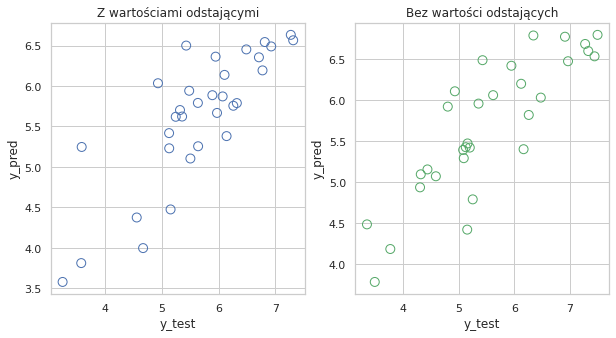

In [20]:
# Jak poszło przewidywanie danych
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].scatter(y_test, y_pred_test, s=80, facecolors='none', edgecolors='b')
ax[0].set_xlabel('y_test')
ax[0].set_ylabel('y_pred')
ax[0].set_title('Z wartościami odstającymi')

ax[1].scatter(y_iqr_test, y_pred_iqr_sc_test, s=80, facecolors='none', edgecolors='g')
ax[1].set_xlabel('y_test')
ax[1].set_ylabel('y_pred')
ax[1].set_title('Bez wartości odstających')

plt.show()

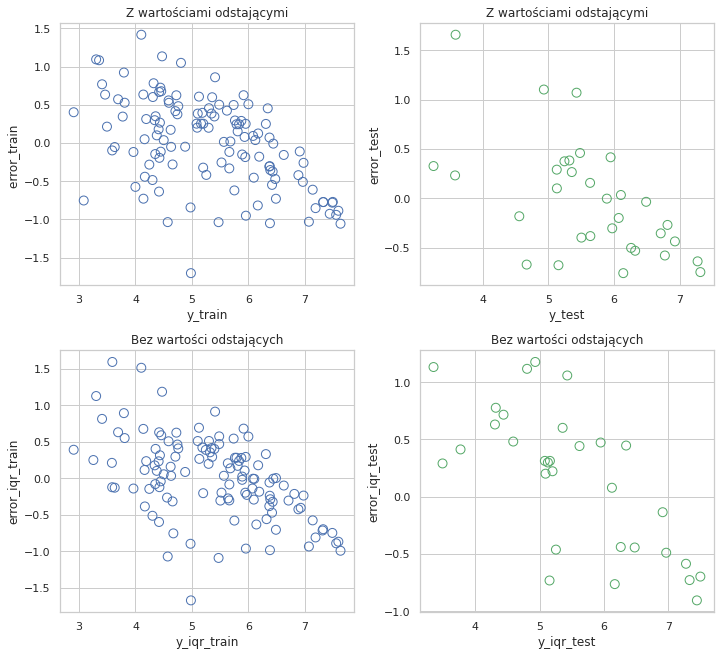

In [21]:
# Wykresy wartości resztowych:
fig, ax = plt.subplots(2, 2, figsize=(10,9), constrained_layout=True)

error_train = y_pred_train - y_train
error_test =  y_pred_test - y_test

ax[0,0].scatter(y_train, error_train, s=80, facecolors='none', edgecolors='b')
ax[0,0].set_xlabel('y_train')
ax[0,0].set_ylabel('error_train ')
ax[0,0].set_title('Z wartościami odstającymi')

ax[0,1].scatter(y_test, error_test, s=80, facecolors='none', edgecolors='g')
ax[0,1].set_xlabel('y_test')
ax[0,1].set_ylabel('error_test')
ax[0,1].set_title('Z wartościami odstającymi')


error_iqr_train = y_pred_iqr_sc_train - y_iqr_train
error_iqr_test =  y_pred_iqr_sc_test - y_iqr_test

ax[1,0].scatter(y_iqr_train, error_iqr_train, s=80, facecolors='none', edgecolors='b')
ax[1,0].set_xlabel('y_iqr_train')
ax[1,0].set_ylabel('error_iqr_train')
ax[1,0].set_title('Bez wartości odstających')

ax[1,1].scatter(y_iqr_test, error_iqr_test, s=80, facecolors='none', edgecolors='g')
ax[1,1].set_xlabel('y_iqr_test')
ax[1,1].set_ylabel('error_iqr_test')
ax[1,1].set_title('Bez wartości odstających')
plt.show()

In [22]:
print('Wartości wag:    {}'.format(lr.coef_))
print('Wartość stała w0: {}'.format(lr.intercept_))

w1 = round(lr.coef_[0][0], 3)
w2 = round(lr.coef_[0][1], 3)
w3 = round(lr.coef_[0][2], 3)

w0 = round(lr.intercept_[0], 3)

print()
print('Równanie funkcji wielomianowej: y = {} + {}x + {}x\u00b2 + {}x\u00b3'.format(w0, w1, w2, w3))


# Ile było dobrych w porównianiu do wszystkich wyników:
# Metoda score oblicza przewidywane wartości w oparciu o X_test, a następnie porównać je z y_test
score = lr.score(X_test, y_test)
print('SCORE: {}%'.format(round(score*100,2)))
print('SCORE (bez wartości odstających): {}%'.format(SCORE_IQR))

Wartości wag:    [[0.40946756 0.36097077 0.28451542]]
Wartość stała w0: [5.37053001]

Równanie funkcji wielomianowej: y = 5.371 + 0.409x + 0.361x² + 0.285x³
SCORE: 67.06%
SCORE (bez wartości odstających): 69.35%
